**기초 프로젝트** __
18조 멍멍냥냥 이민준

# Golden State Warriors – 구단주 관점 분석

## 분석 목표
Golden State Warriors의 **구단 자산 가치, 투자 효율성, 브랜드 영향력, 수익 구조, 장기 성과 관리**를
데이터 기반으로 분석한다.

## 핵심 분석 영역 (2가지)
1. 팀 가치 및 영향력 평가  
   **시즌별 팀 승률 추세 분석 (2003–2022)**  
   → 장기 성장 흐름과 성과의 일관성 평가

2. 홈 구장 기반 경쟁력 및 수익성 평가  
   **홈 어드밴티지 및 승리 요인 분석**  
   → 홈·원정 성적 격차와 주요 경기력 요인 비교

< 구단주 >

질문 : “어디에 투자해야 이 팀의 가치가 커지는가?”

분석 초점 : 장기 승률·랭킹 추세 & 홈 구장 경쟁력 &구조적 변화 여부

결과물 : 투자 방향 결정 & 자산 유지/교체 판단


**======================================================**

# 필요한 라이브러리 불러오기 및 환경 설정



In [39]:
# Golden State Warriors 데이터 분석
# (구단주 관점 분석용 기본 환경 설정)

# ======================================================
#1️. 데이터 처리 라이브러리
import pandas as pd              # 데이터프레임 처리 (CSV 로드, 집계, 정제)
import numpy as np               # 수치 연산 및 배열 처리

# ======================================================
#2. 시각화 라이브러리
import matplotlib.pyplot as plt  # 기본 그래프 시각화
import seaborn as sns            # 통계 기반 고급 시각화

# ======================================================
#3. 경고 메시지 제거
import warnings
warnings.filterwarnings('ignore') # 분석 과정에서 불필요한 경고 메시지를 숨겨 가독성 향상

# ======================================================
#4. Warriors 구단 브랜드 컬러 정의 (시각화 일관성 및 브랜드 아이덴티티 유지)
GSW_BLUE = '#1D428A'     # 골든스테이트 워리어스 블루
GSW_YELLOW = '#FFC72C'   # 골든스테이트 워리어스 옐로우
GSW_GRAY = '#26282A'     # 보조 색상 (다크 그레이)

# ======================================================
#5. 시각화 기본 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # 영문 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지
sns.set_style("whitegrid")                   # 분석용 가독성 높은 그리드 스타일

# ======================================================
#6. 분석 시작 안내 메시지
print("Golden State Warriors - 구단주 관점 분석")

Golden State Warriors - 구단주 관점 분석


# 데이터 로드

## 필요한 CSV 파일:
* games.csv
* teams.csv
* ranking.csv

In [40]:
# CSV 파일 읽기
games = pd.read_csv('games.csv')        # 경기 데이터
teams = pd.read_csv('teams.csv')        # 팀 정보 데이터
ranking = pd.read_csv('ranking.csv')    # 랭킹 데이터

# 데이터 크기 출력
print(f"✓ games: {games.shape[0]:,}행 x {games.shape[1]}열")
print(f"✓ teams: {teams.shape[0]:,}행 x {teams.shape[1]}열")
print(f"✓ ranking: {ranking.shape[0]:,}행 x {ranking.shape[1]}열")

✓ games: 26,651행 x 21열
✓ teams: 30행 x 14열
✓ ranking: 210,342행 x 13열


## 데이터 전처리



## 필요로 하는 CSV 파일의 컬럼들

---

### 1️. teams.csv  
Golden State Warriors의 TEAM_ID 식별 및 구단 기본 정보 확인

**사용 컬럼**
- TEAM_ID  -팀 고유 식별 번호
- NICKNAME  -팀 애칭
- CITY  -연고 도시
- ARENA  -홈 경기장 이름
- YEARFOUNDED  -창단 연도

**전처리**
- `NICKNAME == 'Warriors'` 조건으로 Warriors 행을 필터링함  
- 추출한 `TEAM_ID`를 이후 모든 데이터 분석의 기준 키로 사용함  

---

### 2️. games.csv  
Warriors 경기 데이터 추출 / 홈·원정 구분 / 승패 판정 /  
홈 어드밴티지 및 팀 스탯 분석

**사용 컬럼**
- GAME_ID  -경기 고유 ID
- GAME_DATE_EST  -경기 날짜
- HOME_TEAM_ID  -홈팀 ID
- VISITOR_TEAM_ID  -원정팀 ID
- PTS_home, PTS_away  -홈팀 득점, 원정팀 득점
- AST_home, AST_away  -홈/원정 팀 어시스트 수
- REB_home, REB_away  -홈/원정 팀 리바운드 수
- FG_PCT_home, FG_PCT_away  -홈/원정  팀필드골 성공률
- FG3_PCT_home, FG3_PCT_away  -홈/원정  팀3점슛 성공률
- FT_PCT_home, FT_PCT_away  -홈/원정  팀자유투 성공률

**생성한 파생변수**
- `IS_HOME`  -홈 경기 여부
  - 해당 경기가 Warriors의 홈 경기인지 여부 (True / False)  
- `GSW_WIN`  -Warriors 승리 여부
  - 홈/원정 여부를 고려한 Warriors의 승패 결과  
- `GSW_AST`, `GSW_REB`, `GSW_FG_PCT`, `GSW_FG3_PCT`, `GSW_FT_PCT`  -Warriors 어시스트, Warriors 리바운드, Warriors 필드골 성공률, Warriors 3점 성공률, Warriors 자유투 성공률
  - 홈/원정 기준으로 나뉜 컬럼을 Warriors 기준 팀 스탯으로 재구성  

**전처리**
- 날짜 컬럼(`GAME_DATE_EST`)을 `datetime` 형식으로 변환함  
- 홈/원정 기준 데이터를 Warriors 기준 구조로 재정렬함  

---

### 3️. ranking.csv  
시즌 단위 성과 집계 / 장기 승률 추이 분석 / 컨퍼런스 내 순위 계산

**사용 컬럼**
- TEAM_ID  -팀 ID
- SEASON_ID  -시즌 코드
- STANDINGSDATE  -순위 기준 날짜
- W, L  -시즌 누적 승리 수, 시즌 누적 패배 수
- W_PCT  -승률
- CONFERENCE  -소속 컨퍼런스(west/east)

**생성한 파생변수**
- `SEASON_LABEL`  -시즌 표기
  - 내부 시즌 코드(SEASON_ID)를 사람이 읽기 쉬운 형식으로 변환  
  - 예: `2015-16`  
- `CONF_RANK`  -컨퍼런스 내 순위
  - 시즌별 서부 컨퍼런스 내 승률 기준 순위  

**전처리**
- `STANDINGSDATE`를 `datetime` 형식으로 변환함  
- `W_PCT`를 numeric 타입으로 변환함  
- 분석 대상 시즌을 2003–04 ~ 2022–23 시즌으로 제한함  
- 시즌 단위(`SEASON_ID`)로 groupby하여 승/패 합계 및 평균 승률을 계산함  


**전처리 단계:**
1. Warriors TEAM_ID 식별
2. 날짜 형식 변환
3. 홈/원정 경기 분리
4. Warriors 통계 계산
5. 날짜 -> 시즌 변환

In [41]:
# 데이터 전처리 1

# ======================================================
#1. Golden State Warriors 팀 식별
# teams 테이블에서 닉네임(NICKNAME)이 'Warriors'인 행만 선택
gsw_info = teams[teams['NICKNAME'] == 'Warriors']

# Warriors의 고유 TEAM_ID 추출
# → 이후 모든 경기·랭킹 데이터 필터링의 기준으로 사용
GSW_TEAM_ID = gsw_info['TEAM_ID'].values[0]

# ======================================================
# 2. Warriors 팀 기본 정보 출력
# TEAM_ID가 정확히 추출되었는지 확인하기 위해
# 팀의 기본 데이터를 함께 출력
print(f"\nGolden State Warriors")
print(f"  팀 ID: {GSW_TEAM_ID}")
print(f"  도시: {gsw_info['CITY'].values[0]}")
print(f"  홈 구장: {gsw_info['ARENA'].values[0]}")
print(f"  창단 연도: {gsw_info['YEARFOUNDED'].values[0]}")

# ======================================================
# 3. 날짜 및 수치형 컬럼 전처리
# 경기 날짜 컬럼을 문자열 → datetime 형식으로 변환
# → 연도별·시즌별 시계열 분석 가능
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

# 랭킹 기준 날짜도 datetime 형식으로 변환
ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'])

# 승률(W_PCT)을 숫자형으로 변환
# 변환 불가 값은 NaN으로 처리하여 계산 오류 방지
ranking['W_PCT'] = pd.to_numeric(ranking['W_PCT'], errors='coerce')

# ======================================================
# 4. Warriors 경기 데이터 필터링
# 홈 팀 또는 원정 팀 중 하나라도
# Warriors인 모든 경기만 추출
gsw_games = games[
    (games['HOME_TEAM_ID'] == GSW_TEAM_ID) |
    (games['VISITOR_TEAM_ID'] == GSW_TEAM_ID)
].copy()

# ======================================================
# 5. 홈 / 원정 경기 구분 컬럼 생성
# Warriors 기준으로 홈 경기 여부 확인
# True  → 홈 경기
# False → 원정 경기
gsw_games['IS_HOME'] = gsw_games['HOME_TEAM_ID'] == GSW_TEAM_ID

# ======================================================
# 6. Warriors 기준 승/패 판정 컬럼 생성
# 홈 경기일 경우 : 홈 득점 > 원정 득점 → 승리
# 원정 경기일 경우 : 원정 득점 > 홈 득점 → 승리
gsw_games['GSW_WIN'] = np.where(
    gsw_games['IS_HOME'],
    gsw_games['PTS_home'] > gsw_games['PTS_away'],
    gsw_games['PTS_away'] > gsw_games['PTS_home']
)

# ======================================================
# 7. Warriors 주요 경기력 지표 컬럼 통합
# 홈/원정으로 나뉘어 있는 통계 컬럼을
# Warriors 기준 단일 컬럼으로 통합

# 생성 컬럼:
# - GSW_AST     : Warriors 어시스트
# - GSW_REB     : Warriors 리바운드
# - GSW_FG_PCT  : Warriors 필드골 성공률
# - GSW_FG3_PCT : Warriors 3점슛 성공률
# - GSW_FT_PCT  : Warriors 자유투 성공률
for stat in ['AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT']:
    gsw_games[f'GSW_{stat}'] = np.where(
        gsw_games['IS_HOME'],
        gsw_games[f'{stat}_home'],
        gsw_games[f'{stat}_away']
    )

# ======================================================
# 8. Warriors 랭킹 데이터 필터링
# ranking 테이블에서 Warriors의
# 시즌별 승률 기록만 추출
gsw_ranking = ranking[ranking['TEAM_ID'] == GSW_TEAM_ID].copy()

# ======================================================
# 9. 시즌 ID를 사람이 읽기 쉬운 형식으로 변환하는 함수
def season_to_label(season_id):
    """
    SEASON_ID를 시즌 연도 형식으로 변환
    ex) 22014 → 2014-15
    """
    year_start = int(str(season_id)[1:])
    year_end = year_start + 1
    return f"{year_start}-{str(year_end)[2:]}"

# ======================================================
# 10. 전처리 결과 요약 출력
print("\n시즌 형식: 22014 = 2014-15 시즌")
print(f"\n✓ Warriors 경기 수: {len(gsw_games):,}경기")
print(f"✓ Warriors 랭킹 기록 수: {len(gsw_ranking):,}개")


Golden State Warriors
  팀 ID: 1610612744
  도시: Golden State
  홈 구장: Chase Center
  창단 연도: 1946

시즌 형식: 22014 = 2014-15 시즌

✓ Warriors 경기 수: 1,823경기
✓ Warriors 랭킹 기록 수: 7,025개


In [42]:
# 데이터 전처리 2

# ======================================================
# 1. 시즌 단위 Warriors 성적 집계
# 경기 단위 랭킹 데이터를 시즌(SEASON_ID) 기준으로 집계하여
# '시즌별 성과 요약 테이블' 생성

# → 구단주 관점에서는
#   "한 시즌이 하나의 투자 결과 단위"가 됨
gsw_season = (
    gsw_ranking
    .groupby('SEASON_ID')
    .agg({
        'W': 'sum',            # 시즌 전체 승리 수
        'L': 'sum',            # 시즌 전체 패배 수
        'W_PCT': 'mean',       # 시즌 평균 승률
        'CONFERENCE': 'first'  # 소속 컨퍼런스
    })
    .reset_index()
    .sort_values('SEASON_ID')  # 시즌 시간 흐름 기준 정렬
)

# ======================================================
# 2. 분석 대상 시즌 필터링
# 장기 추세 분석을 위해
# 2003-04 시즌부터 2022-23 시즌까지로 범위 제한

# → 구단 가치의 장기 변화 확인 목적
gsw_season = gsw_season[
    (gsw_season['SEASON_ID'] >= 22003) &
    (gsw_season['SEASON_ID'] <= 22022)
].copy()

# ======================================================
# 3. 시즌 라벨 생성 (가독성 개선)
# 내부 코드 형태의 SEASON_ID를
# 사람이 읽기 쉬운 시즌 표기로 변환
# 예) 22014 → 2014-15
gsw_season['SEASON_LABEL'] = gsw_season['SEASON_ID'].apply(season_to_label)


## 분석 1: **팀 가치 및 영향력 평가** - 장기 성장 흐름과 성과의 일관성 평가

**목표:** 시즌별 팀 랭킹 및 승률 추세 분석 (2003–2022)

**사용 컬럼:**
- `SEASON_ID`: 시즌 식별자
- `W_PCT`: 승률

**전처리:**
- 모든 시즌 선택

**시각화:**  라인 차트
- **선택 이유:**  추세 방향을 효과적으로 보여주기 위해

**인사이트:**
- 추세 기울기 (상승/하락/안정)
- 시즌별 변동성

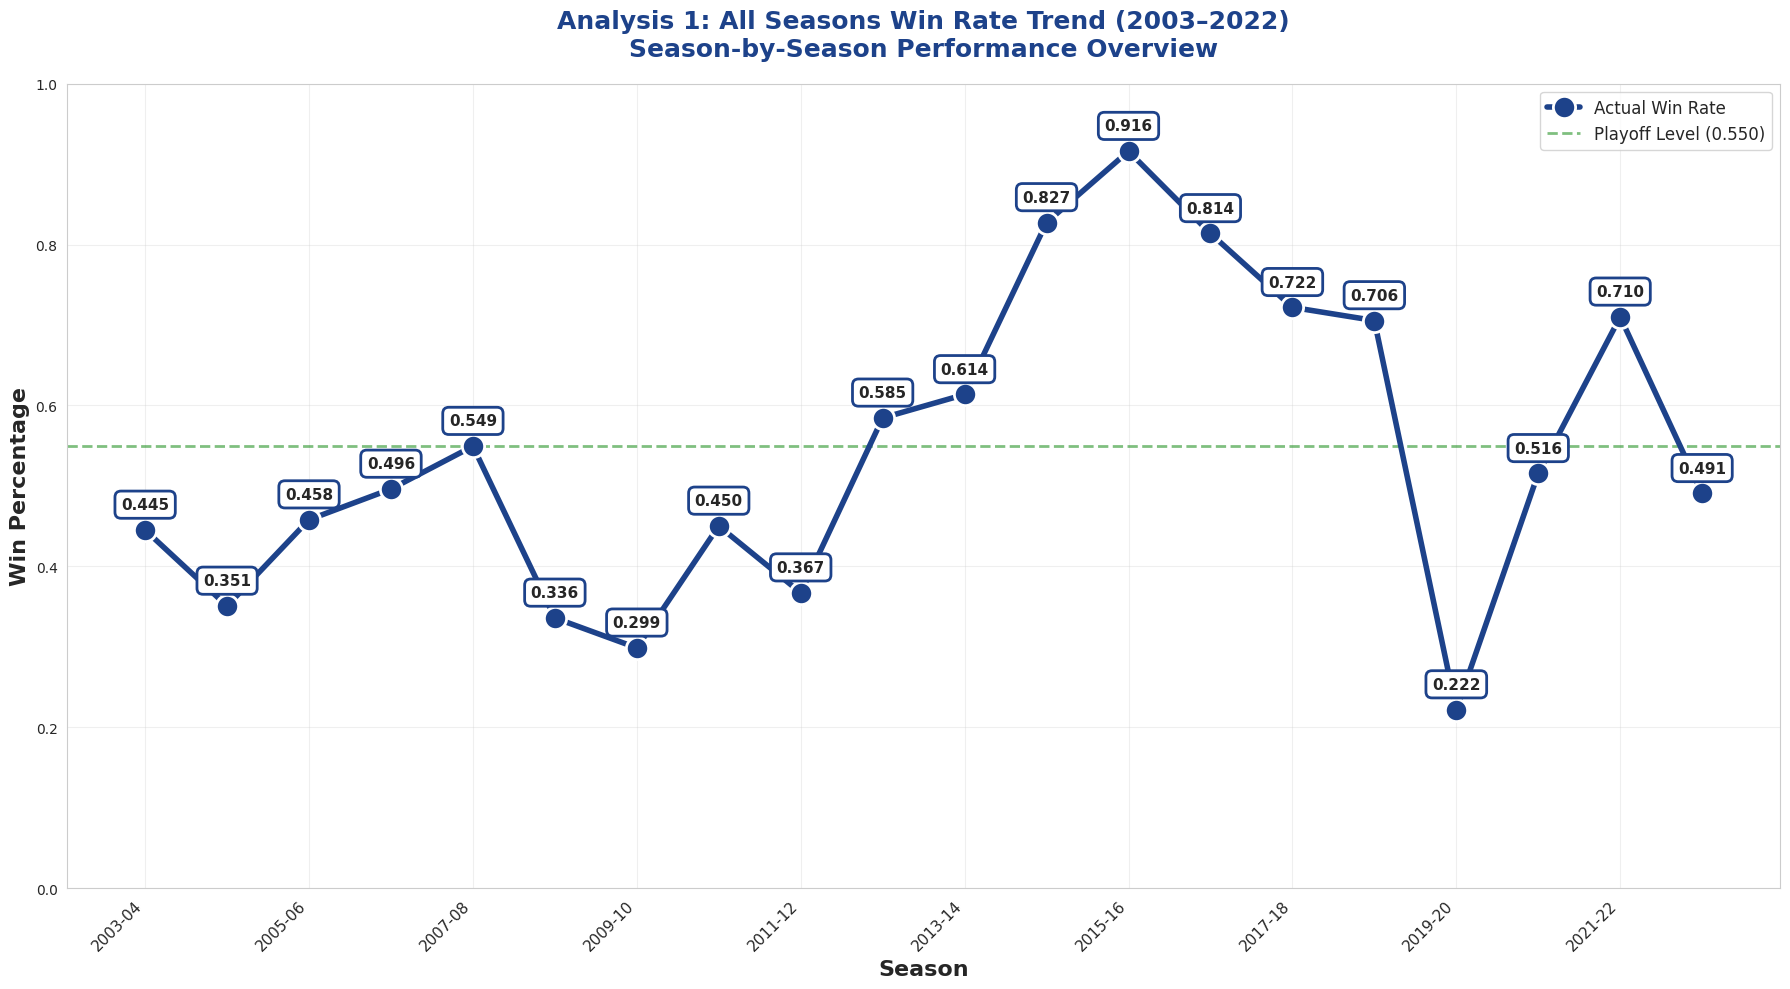


[그래프 설명]
  • X축: 시즌 - 전체 20개 시즌 (2003-04 ~ 2022-23)
  • Y축: 승률 (0.0 ~ 1.0)
  • 파란 실선: 시즌별 실제 승률
  • 녹색 점선: 플레이오프 기준 승률 (0.550)

[핵심 수치]
  • 평균 승률: 0.544
  • 변동성(표준편차): 0.191
  • 첫 시즌: 2003-04 - 0.445
  • 최근 시즌: 2022-23 - 0.491

[해석]
  → 본 그래프는 Warriors의 장기 성과 흐름을 통해
    구단 경쟁력의 유지 여부와 성과 변동성을
    구단주 관점에서 직관적으로 확인하기 위한 분석이다.


In [43]:
# 분석 1

# ======================================================
# 1. 전체 시즌 데이터 준비 (2003–2022)
# 시즌 단위로 집계된 Warriors 성적 데이터를 사용
# → 각 시즌을 하나의 '경영 성과 단위'로 간주
recent_all = gsw_season.copy()            # 모든 시즌 선택 (2003-04 ~ 2022-23)
recent_all = recent_all.reset_index(drop=True)
# 인덱스를 0부터 재설정하여 시계열 표현에 사용

# ======================================================
# 2. 시각화를 위한 X, Y 데이터 정의
# X값: 시즌의 순서를 나타내는 인덱스 (시간 흐름)
x = range(len(recent_all))

# Y값: 시즌별 승률
# → 구단의 경쟁력 및 성과 수준을 대표하는 핵심 지표
y = recent_all['W_PCT'].values

# ======================================================
# 3. 그래프 객체 생성
# 시즌 수가 많기 때문에 넓은 캔버스를 사용하여 가독성 확보
fig, ax = plt.subplots(figsize=(18, 10))

# ======================================================
# 4. 시즌별 실제 승률 추이 시각화
# 선 + 마커 그래프를 사용하여
# 시즌 간 성과 변화 흐름을 직관적으로 표현
ax.plot(
    x, y,
    'o-',
    linewidth=4,
    markersize=16,
    color=GSW_BLUE,              # Warriors 대표 색상
    label='Actual Win Rate',
    markeredgewidth=2,
    markeredgecolor='white',
    zorder=3                     # 가장 위 레이어에 표시
)

# ======================================================
# 5. 각 시즌의 승률 수치 직접 표시
# 단순 추세뿐 아니라,
# 각 시즌의 정확한 성과 수준을 함께 전달하기 위함
for i, val in enumerate(y):
    ax.annotate(
        f'{val:.3f}',            # 소수점 셋째 자리까지 표시
        xy=(i, val),             # 실제 데이터 위치
        xytext=(0, 15),          # 점 위로 15픽셀 이동
        textcoords='offset points',
        ha='center',
        fontsize=11,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.4',
            facecolor='white',
            edgecolor=GSW_BLUE,
            linewidth=2
        )
    )

# ======================================================
# 6. 플레이오프 기준선 표시
# 승률 0.550은 약 45승에 해당하며,
# NBA에서 경험적으로 '플레이오프 안정권'으로
# 간주되는 최소 성과 기준선
#
# → 구단주 관점에서는
#   "이 선 위에 있으면 수익·브랜드 가치가 유지되는 시즌"
ax.axhline(
    0.550,
    color='green',
    linestyle='--',
    linewidth=2,
    alpha=0.5,
    label='Playoff Level (0.550)'
)

# ======================================================
# 7. 축 라벨 및 그래프 제목 설정
ax.set_xlabel('Season', fontsize=16, fontweight='bold')
ax.set_ylabel('Win Percentage', fontsize=16, fontweight='bold')

# 장기 성과 흐름을 강조하는 제목
ax.set_title(
    'Analysis 1: All Seasons Win Rate Trend (2003–2022)\n'
    'Season-by-Season Performance Overview',
    fontsize=18,
    fontweight='bold',
    pad=20,
    color=GSW_BLUE
)

# ======================================================
# 8. X축 시즌 라벨 정리
# 시즌 수가 많아 과도한 라벨 중첩을 방지
# → 최대 약 10개 시즌만 표시
step = max(1, len(recent_all) // 10)

ax.set_xticks(range(0, len(recent_all), step))
ax.set_xticklabels(
    [recent_all['SEASON_LABEL'].iloc[i]
     for i in range(0, len(recent_all), step)],
    rotation=45,
    ha='right',
    fontsize=11
)

# ======================================================
# 9. 기타 시각 요소 설정
ax.legend(loc='best', fontsize=12)   # 범례 자동 배치
ax.grid(True, alpha=0.3)             # 보조선 표시
ax.set_ylim(0, 1)                    # 승률 범위 고정 (0~1)

# ======================================================
# 10. 그래프 출력
plt.tight_layout()   # 서브플롯·라벨 겹침 방지를 위한 레이아웃 자동 조정
save_path = "analysis_01_warriors_winrate_trend_2003_2022.png"

plt.savefig(
    save_path,
    dpi=300,              # 고해상도 (출판/보고서용)
    bbox_inches="tight",  # 여백 자동 제거
    facecolor="white"     # 배경 흰색 고정
)
plt.show()           # 그래프 화면 출력

# ======================================================
# 11. 기초 인사이트 지표 계산
# 시즌별 승률의 표준편차
# → 성과의 일관성(안정성) 지표
volatility = recent_all['W_PCT'].std()

# ======================================================
# 전체 기간 평균 승률
# → 장기적인 팀 경쟁력 수준
avg_winrate = recent_all['W_PCT'].mean()

# ======================================================
# 12. 분석 결과 요약 출력
print("\n[그래프 설명]")
print(f"  • X축: 시즌 - 전체 {len(recent_all)}개 시즌 (2003-04 ~ 2022-23)")
print("  • Y축: 승률 (0.0 ~ 1.0)")
print("  • 파란 실선: 시즌별 실제 승률")
print("  • 녹색 점선: 플레이오프 기준 승률 (0.550)")
print("\n[핵심 수치]")
print(f"  • 평균 승률: {avg_winrate:.3f}")
print(f"  • 변동성(표준편차): {volatility:.3f}")
print(f"  • 첫 시즌: {recent_all.iloc[0]['SEASON_LABEL']} - {recent_all.iloc[0]['W_PCT']:.3f}")
print(f"  • 최근 시즌: {recent_all.iloc[-1]['SEASON_LABEL']} - {recent_all.iloc[-1]['W_PCT']:.3f}")
print("\n[해석]")
print(
    "  → 본 그래프는 Warriors의 장기 성과 흐름을 통해\n"
    "    구단 경쟁력의 유지 여부와 성과 변동성을\n"
    "    구단주 관점에서 직관적으로 확인하기 위한 분석이다."
)

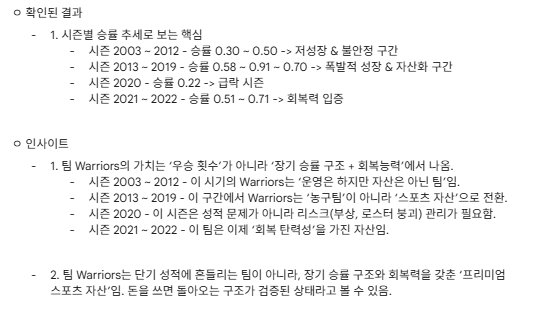

## 분석 2 : 홈 어드밴티지 및 승리 요인

**목표:** 홈 구장 수익성과 핵심 성공 요인 분석

**사용 컬럼:**
- `IS_HOME`: 홈/원정 구분자
- `GSW_WIN`: 승/패
- `GSW_AST`: 어시스트
- `GSW_REB`: 리바운드
- `GSW_FG_PCT`: 필드골 성공률
- `GSW_FG3_PCT`: 3점슛 성공률
- `GSW_FT_PCT`: 자유투 성공률

**전처리:**
- 홈/원정 경기 분리
- 홈 vs 원정 승률 계산
- 승리 요인 상관관계 분석

**시각화:**
- Part A: 홈/원정 승률 비교 파이 차트
- Part B: 상관계수를 보여주는 막대 차트

**선택 이유:** 파이 차트는 승/패 분포를 명확히 보여주고, 막대 차트는 요인의 중요도 순위를 표시

**인사이트:**
- 홈 어드밴티지 크기
- 승리를 위한 핵심 통계
- 투자 우선순위

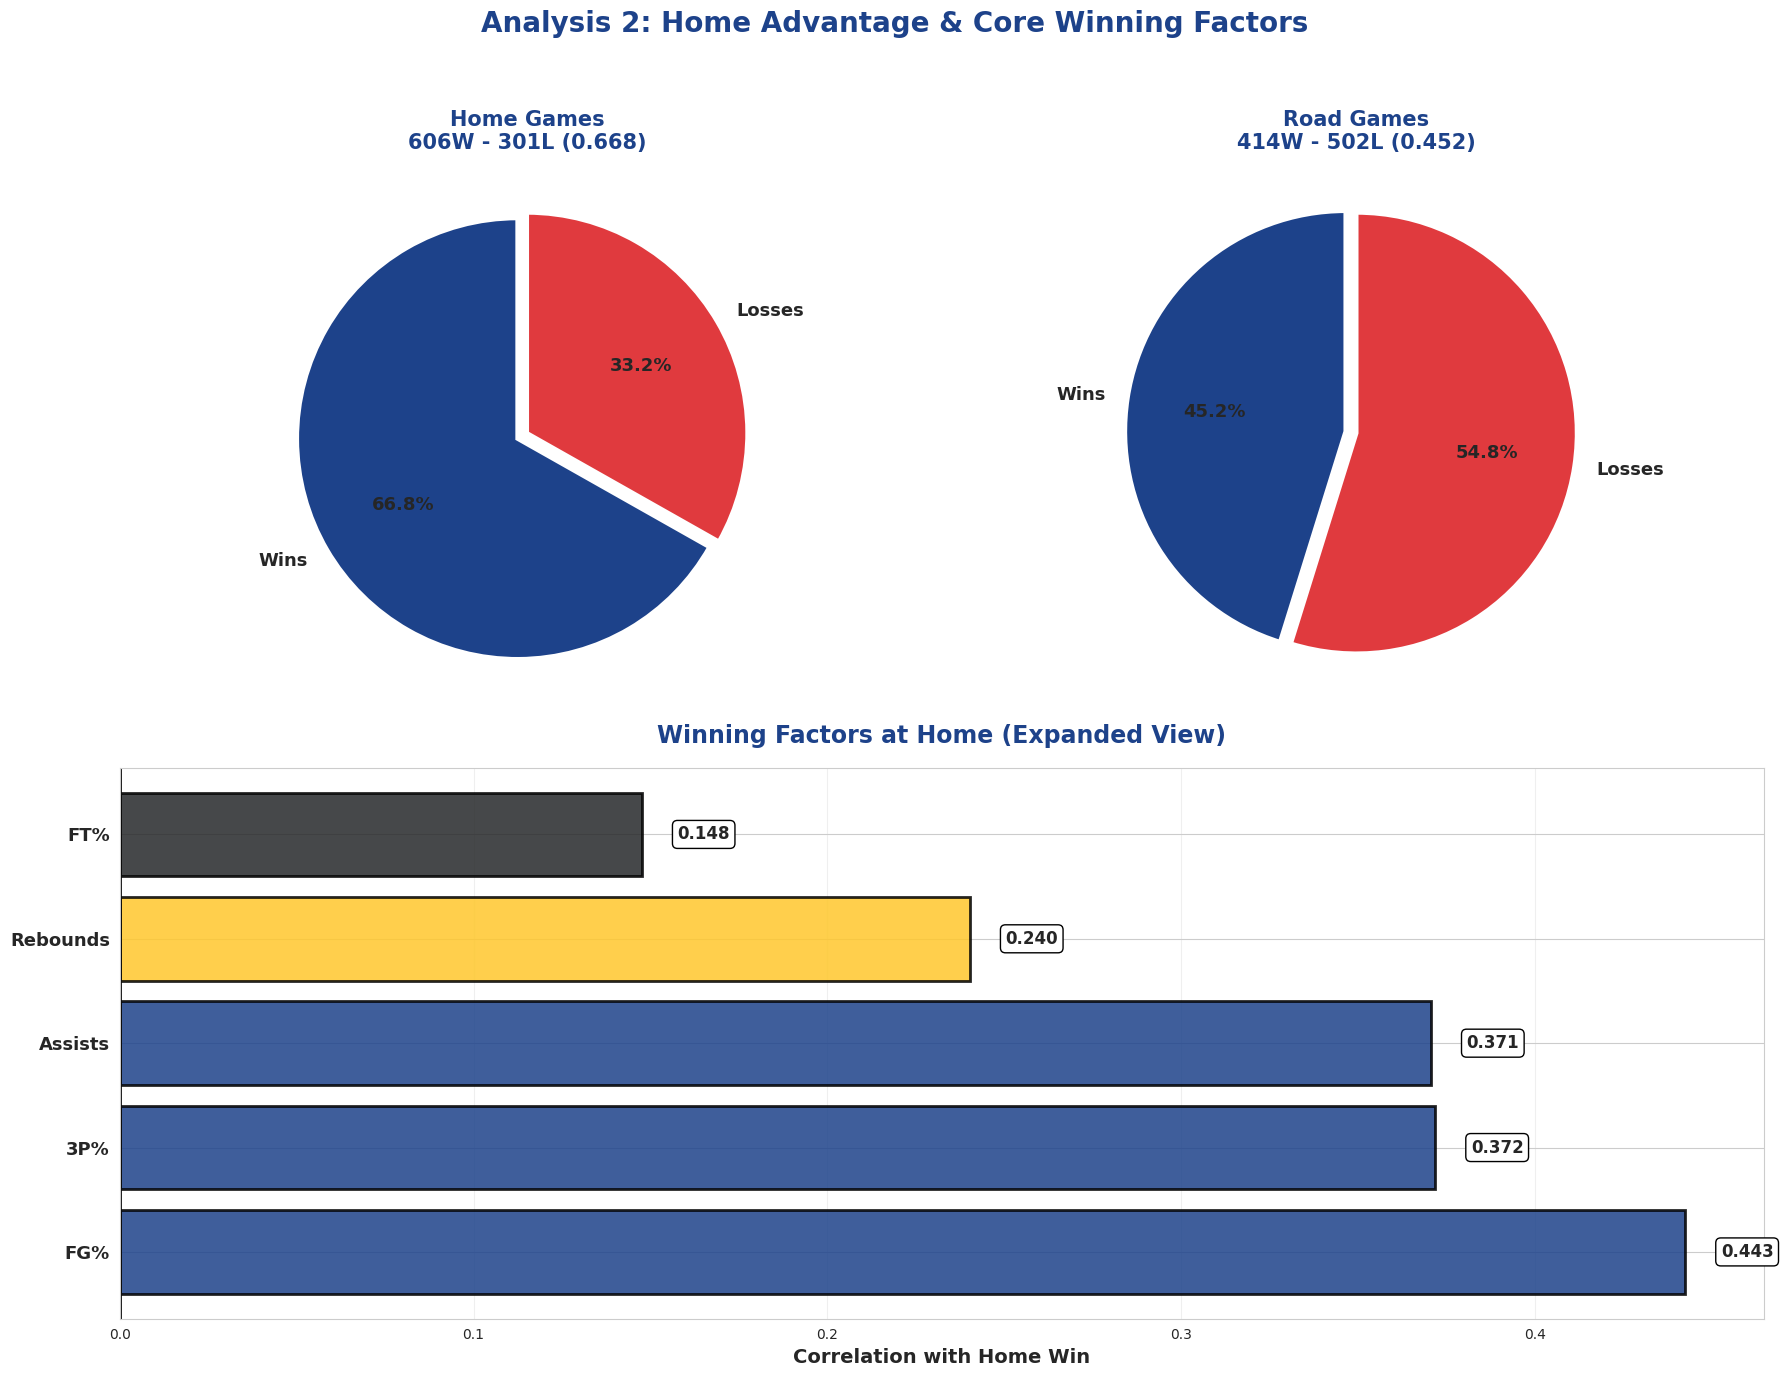


[핵심 발견]
• 홈 승률: 0.668
• 원정 승률: 0.452
• 홈 어드밴티지: +0.216
• 최우선 승리 요인: FG% (상관계수 0.443)

[그래프 설명]
  • 좌상: 홈 경기 승/패 비율
  • 우상: 원정 경기 승/패 비율
  • 하: 홈 승리 요인 상관관계
  • Assists: 어시스트 (팀 플레이 지표)
  • Rebounds: 리바운드 (에너지·피지컬)
  • FG: 필드골 성공률 (공격 효율)
  • 3P: 3점 성공률 (현대 농구 핵심)
  • FT: 자유투 성공률 (안정성)

[핵심 발견]
  • 홈 승률: 0.668 (606승-301패)
  • 원정 승률: 0.452 (414승-502패)
  • 홈 어드밴티지: +0.216

  • 최우선 승리 요인: FG% (상관계수: 0.443)

[승리 요인 순위]
  1. FG%: 0.443
  2. 3P%: 0.372
  3. Assists: 0.371
  4. Rebounds: 0.240
  5. FT%: 0.148

[투자 우선순위]
  1순위: FG% 강화
  2순위: 3P% 보완
  3순위: Assists 관리


In [44]:
# 분석 2

# ======================================================
# 1. 홈 / 원정 경기 분리
gsw_home = gsw_games[gsw_games['IS_HOME'] == True]
gsw_away = gsw_games[gsw_games['IS_HOME'] == False]

# ======================================================
# 2. 홈 / 원정 승률
home_wr = gsw_home['GSW_WIN'].mean()
away_wr = gsw_away['GSW_WIN'].mean()
home_advantage = home_wr - away_wr

# ======================================================
# 3. 홈 / 원정 승패 수
home_w = gsw_home['GSW_WIN'].sum()
home_l = len(gsw_home) - home_w
away_w = gsw_away['GSW_WIN'].sum()
away_l = len(gsw_away) - away_w

# ======================================================
# 4. 홈 경기 승/패 분리
gsw_home_wins = gsw_home[gsw_home['GSW_WIN'] == True]
gsw_home_losses = gsw_home[gsw_home['GSW_WIN'] == False]

# ======================================================
# 5. 분석 대상 스탯 컬럼
stats_cols = [
    'GSW_AST',
    'GSW_REB',
    'GSW_FG_PCT',
    'GSW_FG3_PCT',
    'GSW_FT_PCT'
]

# ======================================================
# 6. 홈 경기 승리 요인 상관관계
gsw_home_copy = gsw_home[['GSW_WIN'] + stats_cols].copy()
gsw_home_copy['GSW_WIN'] = gsw_home_copy['GSW_WIN'].astype(int)

correlations = gsw_home_copy.corr()['GSW_WIN'].drop('GSW_WIN')
correlations.index = ['Assists', 'Rebounds', 'FG%', '3P%', 'FT%']

# ======================================================
# 7. 시각화 (상단 2 + 하단 확장 1)
fig = plt.figure(figsize=(18, 14))

ax1 = plt.subplot2grid((2, 2), (0, 0))              # 홈 파이
ax2 = plt.subplot2grid((2, 2), (0, 1))              # 원정 파이
ax4 = plt.subplot2grid((2, 2), (1, 0), colspan=2)   # 승리 요인 확장

# 7-A. 홈 경기 승/패 비율
ax1.pie(
    [home_w, home_l],
    labels=['Wins', 'Losses'],
    autopct='%1.1f%%',
    colors=[GSW_BLUE, '#E03A3E'],
    startangle=90,
    explode=(0.05, 0),
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)
ax1.set_title(
    f'Home Games\n{home_w}W - {home_l}L ({home_wr:.3f})',
    fontsize=15,
    fontweight='bold',
    color=GSW_BLUE
)

# 7-B. 원정 경기 승/패 비율
ax2.pie(
    [away_w, away_l],
    labels=['Wins', 'Losses'],
    autopct='%1.1f%%',
    colors=[GSW_BLUE, '#E03A3E'],
    startangle=90,
    explode=(0.05, 0),
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)
ax2.set_title(
    f'Road Games\n{away_w}W - {away_l}L ({away_wr:.3f})',
    fontsize=15,
    fontweight='bold',
    color=GSW_BLUE
)

# 7-D. 홈 경기 승리 요인 상관관계 (확장)
correlations = correlations.sort_values(ascending=False)
colors_corr = [
    GSW_BLUE if v > 0.25 else
    GSW_YELLOW if v > 0.15 else
    GSW_GRAY
    for v in correlations.values
]

bars = ax4.barh(
    range(len(correlations)),
    correlations.values,
    color=colors_corr,
    alpha=0.85,
    edgecolor='black',
    linewidth=2
)

ax4.set_yticks(range(len(correlations)))
ax4.set_yticklabels(
    correlations.index,
    fontsize=13,
    fontweight='bold'
)
ax4.set_xlabel(
    'Correlation with Home Win',
    fontsize=14,
    fontweight='bold'
)
ax4.set_title(
    'Winning Factors at Home (Expanded View)',
    fontsize=17,
    fontweight='bold',
    color=GSW_BLUE,
    pad=18
)

ax4.axvline(0, color='black', linewidth=2)
ax4.grid(True, axis='x', alpha=0.3)

# 상관계수 값 표시
for i, (bar, v) in enumerate(zip(bars, correlations.values)):
    ax4.text(
        v + 0.01,
        i,
        f'{v:.3f}',
        va='center',
        ha='left',
        fontsize=12,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.3',
            facecolor='white',
            edgecolor='black'
        )
    )

# ------------------------------------------------------
# 8. 전체 제목 및 저장
plt.suptitle(
    'Analysis 2: Home Advantage & Core Winning Factors',
    fontsize=20,
    fontweight='bold',
    y=0.98,
    color=GSW_BLUE
)

plt.tight_layout(rect=[0, 0, 1, 0.95])

save_path = "analysis_02_home_advantage_winning_factors.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# ------------------------------------------------------
# 9. 핵심 인사이트 출력
top_factor = correlations.idxmax()
top_corr = correlations.max()

print("\n[핵심 발견]")
print(f"• 홈 승률: {home_wr:.3f}")
print(f"• 원정 승률: {away_wr:.3f}")
print(f"• 홈 어드밴티지: {home_advantage:+.3f}")
print(f"• 최우선 승리 요인: {top_factor} (상관계수 {top_corr:.3f})")

# ======================================================
# 10. 분석 결과 요약 출력
print("\n[그래프 설명]")
print("  • 좌상: 홈 경기 승/패 비율")
print("  • 우상: 원정 경기 승/패 비율")
print("  • 하: 홈 승리 요인 상관관계")
print("  • Assists: 어시스트 (팀 플레이 지표)")
print("  • Rebounds: 리바운드 (에너지·피지컬)")
print("  • FG: 필드골 성공률 (공격 효율)")
print("  • 3P: 3점 성공률 (현대 농구 핵심)")
print("  • FT: 자유투 성공률 (안정성)")

print("\n[핵심 발견]")
print(f"  • 홈 승률: {home_wr:.3f} ({home_w}승-{home_l}패)")
print(f"  • 원정 승률: {away_wr:.3f} ({away_w}승-{away_l}패)")
print(f"  • 홈 어드밴티지: {home_advantage:+.3f}")
print(f"\n  • 최우선 승리 요인: {top_factor} (상관계수: {top_corr:.3f})")

print("\n[승리 요인 순위]")
for i, (factor, corr) in enumerate(
    correlations.sort_values(ascending=False).items(), 1
):
    print(f"  {i}. {factor}: {corr:.3f}")

print("\n[투자 우선순위]")
print(f"  1순위: {top_factor} 강화")
print(f"  2순위: {correlations.sort_values(ascending=False).index[1]} 보완")
print(f"  3순위: {correlations.sort_values(ascending=False).index[2]} 관리")

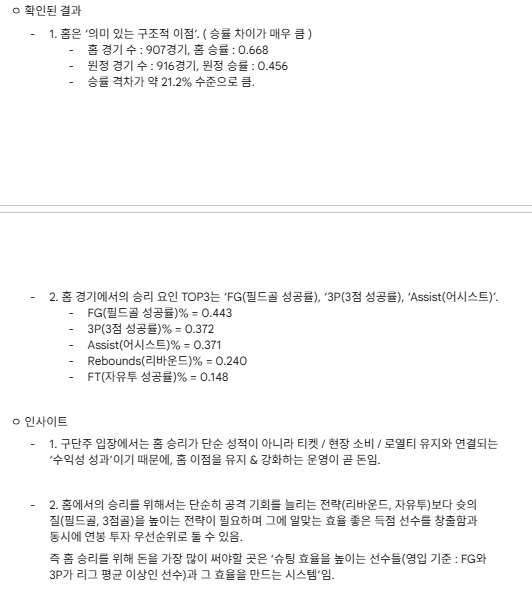

**======================================================**

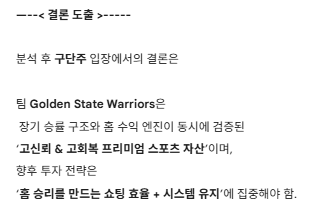

# Golden State Warriors – 구단주 관점 분석

## 분석 목표
Golden State Warriors의 **구단 자산 가치, 투자 효율성, 브랜드 영향력, 수익 구조, 장기 성과 관리**를
데이터 기반으로 분석한다.

## 핵심 분석 영역 (2가지)
1. 팀 가치 및 영향력 평가  
   **시즌별 팀 랭킹 및 승률 추세 분석 (2003–2022)**  
   → 장기 성장 흐름과 성과의 일관성 평가

2. 홈 구장 기반 경쟁력 및 수익성 평가  
   **홈 어드밴티지 및 승리 요인 분석**  
   → 홈·원정 성적 격차와 주요 경기력 요인 비교

< 구단주 >

질문 : “어디에 투자해야 이 팀의 가치가 커지는가?”

분석 초점 : 장기 승률·랭킹 추세 & 홈 구장 경쟁력 &구조적 변화 여부

결과물 : 투자 방향 결정 & 자산 유지/교체 판단